In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D
from keras import optimizers
from keras.optimizers import Adadelta,Adam


#from keras.preprocessing import sequence
from keras.losses import categorical_crossentropy


from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
data =pd.read_csv('gdrive/My Drive/fer2013.csv')
data.head()   
pixels = data['pixels'].tolist()
final_pixels_list=[]
for i in range(len(pixels)):
  pixels1=pixels[i].split()
  results = [int(j) for j in pixels1]
  array = np.array(pixels1)
  array=array.reshape(48,48,1)
  array = np.array(array, dtype=np.uint8)
  final_pixels_list.append(array)     
training_count=0
testing_count=0
validation_count=0
for i in range(len(pixels)):
  if data['Usage'][i]=="Training":
    training_count=training_count+1
  elif data['Usage'][i]=='PublicTest':
    validation_count=validation_count+1
  else:
    testing_count=testing_count+1  

print(training_count)
print(validation_count)
print(testing_count)
print(data.tail())
test_output=data['emotion'].tolist()
for i in range(len(test_output)):
     test_output[i]=int(test_output[i])
encoded = to_categorical(test_output)
test_output=encoded

X_train=final_pixels_list[0:training_count]
X_val = final_pixels_list[training_count: training_count+validation_count]
X_test=final_pixels_list[training_count+validation_count:len(final_pixels_list)]

y_train=test_output[0:training_count]
y_val = test_output[training_count:training_count+validation_count]
y_test=test_output[training_count+validation_count:len(final_pixels_list)]

print(len(X_train))
print(len(X_val))
print(len(X_test))
print((y_train.shape))
print(len(y_val))
print(len(y_test))

28709
3589
3589
       emotion                                             pixels        Usage
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest
28709
3589
3589
(28709, 7)
3589
3589


In [3]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print("X: train, val, test shapes: ",X_train.shape, X_val.shape, X_test.shape)
print("Y: train, val, test shapes: ",y_train.shape, y_val.shape, y_test.shape)

X: train, val, test shapes:  (28709, 48, 48, 1) (3589, 48, 48, 1) (3589, 48, 48, 1)
Y: train, val, test shapes:  (28709, 7) (3589, 7) (3589, 7)


In [4]:
from keras.models import model_from_json

batch_size=300

h5_filename = 'gdrive/Team Drives/ML project/Manasa/model1.h5'
json_filepath = 'gdrive/Team Drives/ML project/Manasa/model1.json'
json_file = open(json_filepath,'r')

loaded_model_json = json_file.read()

json_file.close()

saved_model = model_from_json(loaded_model_json)
saved_model.load_weights(h5_filename)

saved_model.summary()

ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
saved_model.compile(loss='categorical_crossentropy',
              optimizer=ada,
              metrics=['accuracy'])



test_scores = saved_model.evaluate(X_test, y_test, batch_size=batch_size)

print("Test Loss: " + str(test_scores[0]))
print("Test Accuracy: " + str(test_scores[1]))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       147584    
__________

In [0]:
y_prob = saved_model.predict(X_test, batch_size=32, verbose=0)

In [60]:

y_pred = [np.argmax(prob) for prob in y_prob]
y_true = [np.argmax(true) for true in y_test]

print(y_prob.shape)
print(len(y_pred))
print(len(y_true))

emotion = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

(3589, 7)
3589
3589


[4.03e-01 9.08e-04 3.12e-03 5.52e-01 1.15e-02 8.07e-05 2.96e-02]
[0. 0. 0. 1. 0. 0. 0.]
3
1/1 [==============================] - 0s 5ms/step
1.0


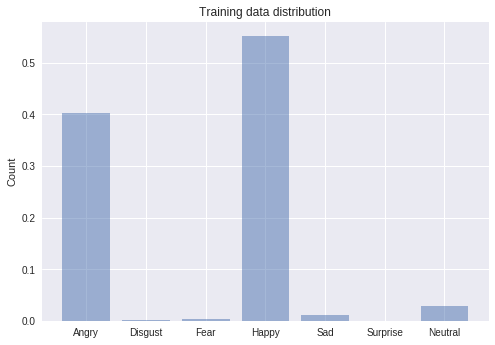

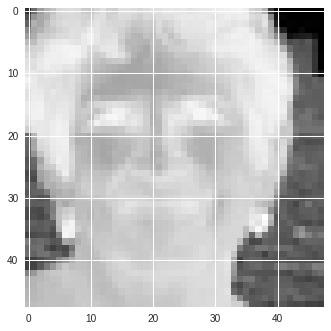

In [61]:
input_img = X_test[20].reshape(48,48)
#plt.imshow(input_img)

y_pos = np.arange(1)
objects = ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise','Neutral')
y_pos = np.arange(len(objects))
performance=y_prob[20]
print(performance)
print(y_test[20])
print(y_pred[20])
#print(X_test[20])
scores = saved_model.evaluate(X_test[20].reshape((1,48,48,1)),y_test[20].reshape(1,7))
print(scores[1])
#plt.imshow(X_test[5].reshape(48,48))
#plt.show()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Training data distribution')
 
#plt.imshow(X_test[5].reshape(48,48))
plt.show()

plt.imshow(input_img)
plt.show()


[[251   4  44  20 114  14  44]
 [ 13  30   1   0   9   1   1]
 [ 56   2 240  20 128  46  36]
 [ 41   2  21 675  64  21  55]
 [ 60   0  63  35 346  10  80]
 [  6   1  31  20  20 320  18]
 [ 45   2  34  43 159  12 331]]


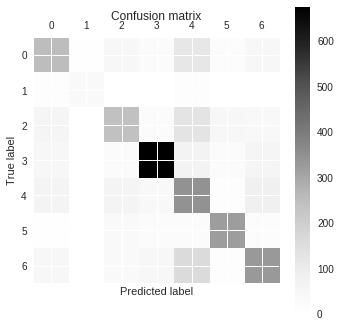

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.array(y_test).argmax(axis=1), np.array(y_prob).argmax(axis=1))

print(cm)

# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[251   4  44  20 114  14  44]
 [ 13  30   1   0   9   1   1]
 [ 56   2 240  20 128  46  36]
 [ 41   2  21 675  64  21  55]
 [ 60   0  63  35 346  10  80]
 [  6   1  31  20  20 320  18]
 [ 45   2  34  43 159  12 331]]
Normalized confusion matrix
[[0.51 0.01 0.09 0.04 0.23 0.03 0.09]
 [0.24 0.55 0.02 0.   0.16 0.02 0.02]
 [0.11 0.   0.45 0.04 0.24 0.09 0.07]
 [0.05 0.   0.02 0.77 0.07 0.02 0.06]
 [0.1  0.   0.11 0.06 0.58 0.02 0.13]
 [0.01 0.   0.07 0.05 0.05 0.77 0.04]
 [0.07 0.   0.05 0.07 0.25 0.02 0.53]]


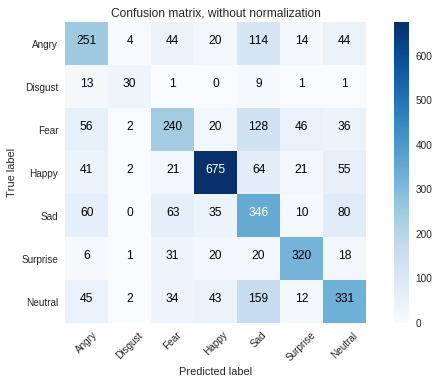

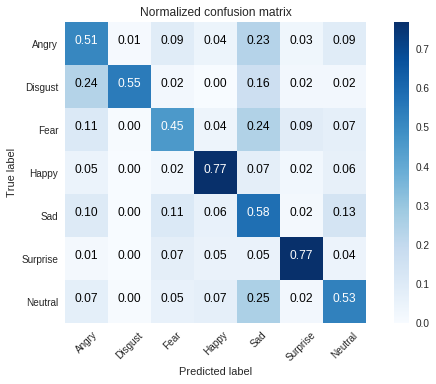

In [63]:
# Compute confusion matrix
cnf_matrix = cm
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(objects),
                      title='Confusion matrix, without normalization')
plt.grid('off')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(objects), normalize=True,
                      title='Normalized confusion matrix')


plt.grid('off')

plt.show()

In [0]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prob.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

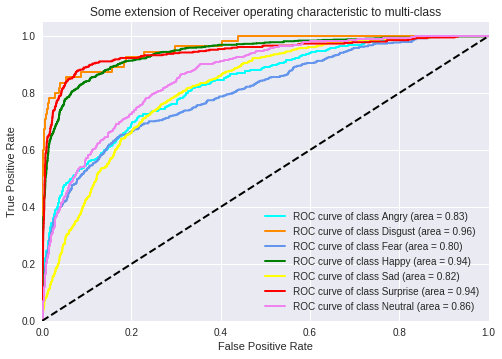

In [65]:
# Compute macro-average ROC curve and ROC area
from scipy import interp
from itertools import cycle

lw=2

n_classes =7
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green','yellow','red','violet'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(emotion[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

Fear
